## Лабораторная работа 2. Мельников Евгений 18ПМИ-1, Малышева Екатерина 18ПМИ-2

### Класс вершина, который используется всеми деревьями

In [14]:
pip install bintrees


In [15]:
import bintrees
from random import randint, shuffle
import time
import matplotlib.pyplot as plt


In [16]:
 class Node():
  def __init__(self, key, priority=0):
    self.parent = None
    self.left = None
    self.right = None
    self.height_left = 0
    self.height_right = 0
    self.key = key
    self.balance_factor = 0
    self.priority = priority


### Базовый класс бинарное дерево, от которого наследуются все остальные деревья

### В нем реализованы операции поворотов, вставка, удаление, поиск

In [17]:
class binary_tree():
  def __init__(self):
    self.root = None



  def connect_nodes(self, parent, son):  # поздно осознал, поэтому нигде не используется 

    son.parent = parent
    if parent.left is son:
      parent.left = son
    elif parent.right is son:
      parent.right = son 

  #---------- Simple operations ----------#  


  # при успешной вставке возвращается сама вставленная вершина 
  # если вершина с таким ключом уже существует, функция возвращает None, что используется для проверки успешности вставки в других методах
  def insert(self, new_key):  
    if self.root is None:
      self.root = Node(new_key) 
      return self.root
    else:
      current_node = self.root
      while (1):        
        if new_key > current_node.key:          
          if current_node.right is None:
            current_node.right = Node(new_key)
            current_node.right.parent = current_node
            return current_node.right
          else: 
            current_node = current_node.right
            continue
        elif new_key < current_node.key: 
          if current_node.left is None:
            current_node.left = Node(new_key)
            current_node.left.parent = current_node
            return current_node.left
          else:
            current_node = current_node.left
            continue
        elif new_key == current_node.key: 
          #print('Node with key %s already exists, skipping the insertion' % new_key)
          return None


  # если вершина находится, то функция возвращает эту вершину
  # если вершины с таким ключом нет, функция возвращает None
  def search(self, key):
    if self.root is not None:
      current_node = self.root
      while (1):
        if key > current_node.key: 
          if current_node.right is not None: 
            current_node = current_node.right
          else:
            #print('Node with key {} hasn\'t been found'.format(key)) 
            return None
        elif key < current_node.key:
          if current_node.left is not None: 
            current_node = current_node.left
          else:
            #print('Node with key {} hasn\'t been found'.format(key)) 
            return None
        elif key == current_node.key:
          return current_node

    else:
      #print("Tree is empty")
      return None
      
    


  def delete(self, key):

    node_to_delete = self.search(key)

    if node_to_delete is not None: # проверяем, нашлась ли нужная для удаления вершина по ключу
      # случай, когда удаляем вершину без сыновей
      if node_to_delete.left is None and node_to_delete.right is None:

        if node_to_delete is self.root:
          self.root = None
        else:
          if node_to_delete.parent.left is node_to_delete:
            node_to_delete.parent.left = None
          elif node_to_delete.parent.right is node_to_delete:
            node_to_delete.parent.right = None

      # случай, когда у вершины есть левый сын
      elif node_to_delete.left is not None and node_to_delete.right is None:

        if node_to_delete is not self.root:
          node_to_delete.left.parent = node_to_delete.parent

          if node_to_delete.parent.left is node_to_delete:
            node_to_delete.parent.left = node_to_delete.left       

          elif node_to_delete.parent.right is node_to_delete:
            node_to_delete.parent.right = node_to_delete.left

        else:
          node_to_delete.left.parent = None
          self.root = node_to_delete.left

      # случай, когда у вершины есть правый сын
      elif node_to_delete.left is None and node_to_delete.right is not None:

        if node_to_delete is not self.root:
          node_to_delete.right.parent = node_to_delete.parent

          if node_to_delete.parent.left is node_to_delete:
            node_to_delete.parent.left = node_to_delete.right       

          elif node_to_delete.parent.right is node_to_delete:
            node_to_delete.parent.right = node_to_delete.right

        else:
          node_to_delete.right.parent = None
          self.root = node_to_delete.right       

      
      # случай, когда у вершины есть оба сына
      
      elif node_to_delete.left is not None and node_to_delete.right is not None:  # мб глючит
        io_pred = self.max(node_to_delete.left) # in order predecessor
        
        self.delete(io_pred.key)  # может замедлить 
        if node_to_delete is self.root:
          self.root = io_pred
          io_pred.parent = None
        else:

          io_pred.parent = node_to_delete.parent 
          if node_to_delete.parent.right is node_to_delete:
            node_to_delete.parent.right = io_pred
          elif node_to_delete.parent.left is node_to_delete:
            node_to_delete.parent.left = io_pred 

    

        io_pred.right = node_to_delete.right
        node_to_delete.right.parent = io_pred

        if node_to_delete.left is not None:
          io_pred.left = node_to_delete.left
          node_to_delete.left.parent = io_pred
        
        '''
        if io_pred != node_to_delete.left:
          self.delete(io_pred.key)
          io_pred.left = node_to_delete.left
          io_pred.left.parent = io_pred

        
        io_pred.right = node_to_delete.right
        io_pred.right.parent = io_pred
        if node_to_delete is self.root:
            self.root = io_pred
            io_pred.parent = None
        else:
          
          io_pred.parent = node_to_delete.parent 
          if node_to_delete.parent.right is node_to_delete:
            node_to_delete.parent.right = io_pred
          elif node_to_delete.parent.left is node_to_delete:
            node_to_delete.parent.left = io_pred    
           '''
      return node_to_delete

  def max(self, node):
    while (node.right is not None):
      node = node.right
    return node

  #---------- Rotations ----------# 
  # функции принимают на вход ту вершину, которая будет "опускаться" вниз
  # возвращает вершину, которая поднялась вверх


  def left_rotation(self, top_node):  
    #     0             O
    #      \           / \
    #       O     =>  0   O   , where 0 is the top node ("старая верхняя вершина")
    #        \
    #         O
    
    parent = top_node.parent # запоминаем родителя
    new_top_node = top_node.right  # запоминаем, вершину, которая будет сверху
    
    top_node.right = None  # очищаем правое дерево старой верхней вершины
    top_node.height_right = 0 # и задаем правому поддереву высоту 0

    if new_top_node.left is not None:  # проверяем, есть ли у новой верхней вершины левое поддерево
      top_node.right = new_top_node.left  # если есть, присваиваем его как правое поддерево старой верхней вершине (так как все элементы в нем больше)
      top_node.height_right = new_top_node.height_left  # переносим высоту
      top_node.right.parent = top_node


    new_top_node.left = top_node  # смещаем старую верхнюю вершину вниз 
    top_node.balance_factor = top_node.height_left - top_node.height_right # вычисляем новый balance factor 

    top_node.parent = new_top_node  # присваиваем старой верхней вершине нового родителя

    if top_node == self.root: # если старая верхняя вершина - корень, то мы ничего связанное с родителем не проверяем и не меняем для новой верхней вершины
      self.root = new_top_node
      new_top_node.parent = None # почему-то здесь ellipsis?

    else:  # в противном случае 
      new_top_node.parent = parent  # присваиваем новой верхней вершине родителя старой верхней вершины 
      if top_node == parent.left: # определяем, к левому или правому поддереву родителя принадлежит вершина
        parent.left = new_top_node # связываем родитиля с новым сыном
      elif top_node == parent.right:
        parent.right = new_top_node
    

    new_top_node.height_left = max(new_top_node.left.height_left, new_top_node.left.height_right) + 1  # пересчитываем высоты, выбирая максимальную высоту поддерева левого сына
    if new_top_node.right is not None: # check for right left turn
      new_top_node.height_right = max(new_top_node.right.height_left, new_top_node.right.height_right) + 1
    new_top_node.balance_factor = new_top_node.height_left - new_top_node.height_right

    # do I need to update parent's heights? NO, since
    return new_top_node


  def right_rotation(self, top_node):
    #     0             O
    #    /             / \
    #   O         =>  O   0  , where 0 is the unbalanced node
    #  /     
    # O        

    parent = top_node.parent # запоминаем родителя
    new_top_node = top_node.left  # запоминаем, вершину, которая будет сверху

    top_node.left = None  # очищаем левое поддерево старой верхней вершины
    top_node.height_left = 0 # и задаем левому поддереву высоту 0

    if new_top_node.right is not None:  # проверяем, есть ли у новой верхней вершины правое поддерево
      top_node.left = new_top_node.right  # если есть, присваиваем его как левое поддерево старой верхней вершине (так как все элементы в нем больше)
      top_node.height_left = new_top_node.height_right  # переносим высоту
      top_node.left.parent = top_node

    new_top_node.right = top_node  # смещаем старую верхнюю вершину вниз 
    top_node.balance_factor = top_node.height_left - top_node.height_right # вычисляем новый balance factor 

    top_node.parent = new_top_node  # присваиваем старой верхней вершине нового родителя

    if top_node == self.root: # если старая верхняя вершина - корень, то мы ничего связанное с родителем не проверяем и не меняем для новой верхней вершины
      self.root = new_top_node
      new_top_node.parent = None # почему-то здесь ellipsis?

    else:  # в противном случае 
      new_top_node.parent = parent  # присваиваем новой верхней вершине родителя старой верхней вершины 
      if top_node == parent.left: # определяем, к левому или правому поддереву родителя принадлежит вершина
        parent.left = new_top_node # связываем родитиля с новым сыном
      elif top_node == parent.right:
        parent.right = new_top_node
    

    if new_top_node.left is not None: # check for right left turn
      new_top_node.height_left = max(new_top_node.left.height_left, new_top_node.left.height_right) + 1  # пересчитываем высоты, выбирая максимальную высоту поддерева левого сына
    
    new_top_node.height_right = max(new_top_node.right.height_left, new_top_node.right.height_right) + 1
    new_top_node.balance_factor = new_top_node.height_left - new_top_node.height_right

    # do I need to update parent's heights? NO, since
    return new_top_node


  def left_right_rotation(self, top_node):  
  #     C                                     C                                 B
  #    /                                     /                                 / \
  #   A       (Left rotation around A) =>   B    (Right rotation around C) => A   C   , where C is the unbalanced node
  #    \                                   / 
  #     B                                 A 
    self.left_rotation(top_node.left)
    new_top_node = self.right_rotation(top_node)
    return new_top_node


  def right_left_rotation(self, top_node):  
  #     A                                    A                                    B
  #      \                                    \                                  / \
  #       C   (Right rotation around C) =>     B    (Left rotation around A) => A   C   , where A is the unbalanced node
  #      /                                      \
  #     B                                        C
    self.right_rotation(top_node.right)
    new_top_node = self.left_rotation(top_node) 
    return new_top_node
    

  def print_rec(self, node):
    if node is not None:
      self.print_rec(node.left)
      print(node.key)
      self.print_rec(node.right)
  
  def print(self):
    self.print_rec(self.root)


### АВЛ дерево


In [18]:
class avl_tree(binary_tree):
  pass
  
  #search такой же, как и в бинарном
  def insert(self, new_key):
    if self.root is None:
      self.root = Node(new_key)
    else:
      self.insert_rec(self.root, new_key)


  def check_height(self, node):  # использутся при удалении вершины с двумя сыновьями
    if node is None:  
      return -1

    node.height_right = self.check_height(node.right) + 1    
    node.height_left = self.check_height(node.left) + 1
    node.balance_factor = node.height_left - node.height_right
    
    if node.balance_factor >= 2 or node.balance_factor <= -2:     
      node = self.rotate(node)


    return max(node.height_right, node.height_left)




  def rotate(self, node):
    #print("Rotate got the node %s with balance factor of %s" %(node.key, node.balance_factor))
    if node.balance_factor >= 2: # если левое поддерево длиннее, крутим в нем
      if node.left.height_left > node.left.height_right: # правый поворот
        return self.right_rotation(node)
      elif node.left.height_left <= node.left.height_right: # левый-правый поворот
        return self.left_right_rotation(node)
    elif node.balance_factor <= -2:  # если правое деревое длиннее, крутим в нем 
      if node.right.height_left >= node.right.height_right: # правый-левый поворот
        return self.right_left_rotation(node)
      elif node.right.height_left < node.right.height_right: # левый поворот 

        return self.left_rotation(node)
    
    print('you fucked up')

  def insert_rec(self, current_node, new_key):   # insert(root, 3)
    
    if new_key > current_node.key:
      if current_node.right is None:
        new_node = Node(new_key)
        new_node.height_left = 0
        new_node.height_right = 0
        new_node.balance_factor = 0
        new_node.parent = current_node

        current_node.right = new_node
        current_node.height_right = 1  # так как добавили нового сына в правое поддерево current вершины, высота этого поддерева равна 1
        
        if current_node.left is None:
          return current_node.height_right  # если слева никого нет, то глубина правого поддерева является максимальной для current_вершины 
        else:
          return current_node.height_left  # если же слева кто-то есть, то глубина левого поддерева больше или равна глубине правого 
      
      else:
        right_depth = self.insert_rec(current_node.right, new_key) + 1    
        current_node.height_right = right_depth
        current_node.balance_factor = current_node.height_left - current_node.height_right
        
        if current_node.balance_factor >= 2 or current_node.balance_factor <= -2: # если оказаывается, что одно из поддеревьев больше на 2
          current_node = self.rotate(current_node)
        
        # current_node.balance_factor = 2:  # значит, левая ветвь больше (скорее всего, не нужно, так как может ведь расти только правая ветвь)

       # if current_node.balance_factor == -2:  # значит, правая ветвь больше (работает оч странно)
       #   print("Unbalanced:", current_node.key)  



        return max(current_node.height_left, current_node.height_right)

    elif new_key < current_node.key:

      if current_node.left is None:
        new_node = Node(new_key)
        new_node.height_left = 0
        new_node.height_right = 0
        new_node.balance_factor = 0
        new_node.parent = current_node

        current_node.left = new_node
        current_node.height_left = 1  # так как добавили нового сына в правое поддерево current вершины, высота этого поддерева равна 1
        
        if current_node.right is None:
          return current_node.height_left  # если справа никого нет, то глубина правого левого является максимальной для current_вершины 
        else:
          return current_node.height_right  # если же справа кто-то есть, то глубина правого поддерева больше или равна глубине левого 
      
      else:
        left_depth = self.insert_rec(current_node.left, new_key) + 1    
        current_node.height_left = left_depth
        current_node.balance_factor = current_node.height_left - current_node.height_right

        if current_node.balance_factor >= 2 or current_node.balance_factor <= -2: # если оказаывается, что одно из поддеревьев больше на 2
          current_node = self.rotate(current_node)

        return max(current_node.height_left, current_node.height_right) # возвращаем родителю максимальную высоту, чтобы он потом прибавил 1 и узнал высоту одного из своих поддеревьев
      
    elif new_key == current_node.key:
      #print('Node with key %s already exists, skipping the insertion' % new_key)
      return max(current_node.height_left, current_node.height_right)
  
  def delete(self, key):
    deleted_node = self.delete_rec(self.root, key)
    return deleted_node

  def delete_rec(self, current_node, key): # this is disgusting 
   
    if current_node is None: # если вершины не существует, возвращаем -1, чтобы у родительской вершины длина поддерева осталась нулевой
      return -1 

    elif key > current_node.key:
      right_depth = self.delete_rec(current_node.right, key) + 1    
      current_node.height_right = right_depth
      current_node.balance_factor = current_node.height_left - current_node.height_right
      
      if current_node.balance_factor >= 2 or current_node.balance_factor <= -2: # если оказывается, что одно из поддеревьев больше на 2
        current_node = self.rotate(current_node)
      
      return max(current_node.height_left, current_node.height_right)

    elif key < current_node.key:
      left_depth = self.delete_rec(current_node.left, key) + 1    
      current_node.height_left = left_depth
      current_node.balance_factor = current_node.height_left - current_node.height_right
      
      if current_node.balance_factor >= 2 or current_node.balance_factor <= -2: # если оказаывается, что одно из поддеревьев больше на 2
        current_node = self.rotate(current_node)
      
      return max(current_node.height_left, current_node.height_right)


    elif current_node.key == key:  # нашли вершину

      # нет сыновей
      if current_node.left is None and current_node.right is None:  
        if current_node is self.root:
          self.root = None
          # return current_node #?
        else: # если не корень
          parent = current_node.parent # запоминаем родителя

          if current_node is parent.left: 
            parent.left = None # отцепляем родителя от вершины
            return -1  # возвращаем -1 для того, чтобы у родителя высота поддерева стала -1 + 1 = 0
          elif current_node is parent.right:
            parent.right = None
            return -1
      
      # сын один справа или слева 
      elif current_node.left is not None and current_node.right is None:
        if current_node is self.root: # если корень, просто ставим на его место потомка
          self.root = current_node.left
          current_node.left.parent = None
          # return current_node
        
        else: # если же вершина не корень
          parent = current_node.parent

          if current_node is parent.left:
            parent.left = current_node.left
            current_node.left.parent = parent 
            return max(parent.left.height_left, parent.left.height_right)


          elif current_node is parent.right:
            parent.right = current_node.left
            current_node.left.parent = parent 
            return max(parent.right.height_left, parent.right.height_right)
     
      
      elif current_node.left is None and current_node.right is not None:
        if current_node is self.root:
          self.root = current_node.right
          current_node.right.parent = None
          return current_node

        else: # если же вершина не корень
          parent = current_node.parent

          if current_node is parent.left:
            parent.left = current_node.right
            current_node.right.parent = parent 
            return max(parent.left.height_left, parent.left.height_right)

          elif current_node is parent.right:
            parent.right = current_node.right
            current_node.right.parent = parent 
            return max(parent.right.height_left, parent.right.height_right)

      elif current_node.left is not None and current_node.right is not None:  # мб глючит
        io_pred = self.max(current_node.left) # in order predecessor

        binary_tree.delete(self, io_pred.key)  # может замедлить 

        if current_node is self.root:
          self.root = io_pred
          io_pred.parent = None
        else:
          parent = current_node.parent

          io_pred.parent = parent 
          if parent.right is current_node:
            parent.right = io_pred
          elif parent.left is current_node:
            parent.left = io_pred   

        io_pred.right = current_node.right
        current_node.right.parent = io_pred

        if current_node.left is not None:
          io_pred.left = current_node.left
          current_node.left.parent = io_pred
        
        #print('checking height for ', io_pred.key)
        self.check_height(io_pred)

        return max(io_pred.height_left, io_pred.height_right)

'''      
      if current_node is self.root: # если вершина - корень 
        

        elif parent.left == current_node:
          binary_tree.delete(self, current_node.key)
          self.check_height(parent)
          return max(parent.left.height_left, parent.left.height_right)

        if parent.right is None:
            return -1

        elif parent.right == current_node:
          binary_tree.delete(self, current_node.key)
          self.check_height(parent)
          return max(parent.right.height_left, parent.right.height_right)


      else:
        parent = current_node.parent

        if parent.left is None:
            return -1

        elif parent.left == current_node:
          binary_tree.delete(self, current_node.key)
          self.check_height(parent)
          return max(parent.left.height_left, parent.left.height_right)

        if parent.right is None:
            return -1

        elif parent.right == current_node:
          binary_tree.delete(self, current_node.key)
          self.check_height(parent)
          return max(parent.right.height_left, parent.right.height_right)
 '''   


'      \n      if current_node is self.root: # если вершина - корень \n        \n\n        elif parent.left == current_node:\n          binary_tree.delete(self, current_node.key)\n          self.check_height(parent)\n          return max(parent.left.height_left, parent.left.height_right)\n\n        if parent.right is None:\n            return -1\n\n        elif parent.right == current_node:\n          binary_tree.delete(self, current_node.key)\n          self.check_height(parent)\n          return max(parent.right.height_left, parent.right.height_right)\n\n\n      else:\n        parent = current_node.parent\n\n        if parent.left is None:\n            return -1\n\n        elif parent.left == current_node:\n          binary_tree.delete(self, current_node.key)\n          self.check_height(parent)\n          return max(parent.left.height_left, parent.left.height_right)\n\n        if parent.right is None:\n            return -1\n\n        elif parent.right == current_node:\n          bi

### Сплей дерево

In [19]:
class splay_tree(binary_tree):
  pass


#---------- Splay tree specific operations ----------#
  def splay(self, node):
    while node is not self.root:
          
      if node.parent is self.root: # если родитель вершины - корень 
        self.zig(node) 
      else:
        parent = node.parent
        grandparent = node.parent.parent

      # смотрится так себе, но вроде теперь работает 
        if parent.right is not None and parent.right is node:
          if grandparent.right is not None and grandparent.right is parent:
            self.zigzig(node)
          elif grandparent.left is not None and grandparent.left is parent:          
            self.zigzag(node)
        elif parent.left is not None and parent.left is node: 
          if grandparent.right is not None and grandparent.right is parent:
            self.zigzag(node)
          elif grandparent.left is not None and grandparent.left is parent:           
            self.zigzig(node)


  def zig(self, node):
    if node.parent.right is node:
      self.left_rotation(node.parent)  
    elif node.parent.left is node: 
      self.right_rotation(node.parent)


  def zigzig(self, node):
    if node.parent.right is node:
      self.left_rotation(node.parent.parent)
      self.left_rotation(node.parent)  
    elif node.parent.left is node: 
      self.right_rotation(node.parent.parent)
      self.right_rotation(node.parent)      


  def zigzag(self, node):
    if node.parent.right is node:      
      self.left_right_rotation(node.parent.parent)  
    elif node.parent.left is node: 
      self.right_left_rotation(node.parent.parent) 


#---------- Simple operations ----------#
  # если вершина находится, то функция возвращает эту вершину
  # если вершины с таким ключом нет, функция возвращает None
  def search(self, key):
    node = binary_tree.search(self, key)
    if node is not None: 
      self.splay(node)  
    return node

  
  
  def insert(self, new_key):
    #print(new_key)
    new_node = binary_tree.insert(self, new_key)
    if new_node is not None: # если вершина вставилась
      #pass
      self.splay(new_node)


  def delete(self, key):
    deleted_node = binary_tree.delete(self, key)
    #print("splay for", deleted_node.parent, deleted_node.key)
    if deleted_node is not None and deleted_node is not self.root and deleted_node.parent is not None: 
      self.splay(deleted_node.parent)
      #pass


### Курево (декартово дерево)


In [20]:


#search такой же как у бинарного
# delete рабочий 
# insert тоже
# написать тесты, работает на глаз)))
# проверка перед merge на keys(T1)<=k<=keys(T2)
# написать норм рандом
class treap(binary_tree):
  pass


  def merge(self ,T1_node, T2_node):
    
    if T1_node is None:
        return T2_node
    elif T2_node is None:
        return T1_node
  # else:
    #  print('merging', T1_node.key, T2_node.key)
    if T1_node.priority >= T2_node.priority:
      
      T1_node.right=self.merge(T1_node.right,T2_node)
      return T1_node

    else:
      
      T2_node.left=self.merge(T1_node,T2_node.left)
      return T2_node

  def split(self, T_node, key):
    if T_node == None:
        return (None,None)
    if key >= T_node.key:
        T_node.right ,T2_node = self.split(T_node.right,key)
        T1_node=T_node
        return (T1_node,T2_node)
    else:
        T1_node,T_node.left = self.split(T_node.left,key) 
        T2_node=T_node
        return (T1_node,T2_node)


  def insert(self, key, priority=randint(1,1001) ):
    if self.search( key) is None:
      new_node= Node(key, priority)
      T1_root, T2_root= self.split(self.root,key )
      self.root=self.merge(self.merge(T1_root, new_node), T2_root)
    #else:
      #print('node',key, 'already in treap')
    
  

  def delete(self, key):
    #if self.search(key) is  not None:
    T1_root, T2_root= self.split(self.root,key-1)
    del_node, T2_root=self.split(T2_root, key)
    self.root=self.merge(T1_root, T2_root)
    #else:
      #print ('there is no node', key, 'in treap')





def inorder(root, mas):
  if root is None:  
      return 
  else:
      inorder(root.left, mas)
      #print(root.key, end=" ")
      mas.append(root.key)
      inorder(root.right, mas)



## Графики и тесты

In [21]:
def gen_mas(n, a, b):
  l=[]
  for i in range(n):
    l.append(randint(a, b))
  return l


### Стресс тесты

In [22]:
def stress_test_insert_delete_search_treap(n, a=1, b=10001, iterations_num=100):
  for k in range(iterations_num):
    #inseart 
    gen_m = gen_mas(n, a, b)
    #print(gen_m)
    to_test=treap()
    to_check=bintrees.RBTree()
    for i in range(n):
      to_test.insert(gen_m[i], randint(0, n))
      to_check.insert(gen_m[i], None)
    to_test_mas=[]
    to_check_mas=[]
    inorder(to_test.root, to_test_mas)
    inorder(to_check._root, to_check_mas)
    for m in range(len(to_check_mas)):
      if to_check_mas[m]!=to_test_mas[m]:
        raise Exception(f'mistake in insertion')
    
    #search 
    for i in range(n):
      key=randint(a, b)
      if bool(to_test.search( key))!= (key in to_check):
        raise Exception(f'mistake in searching')
    
    #remove
    len_created=len(to_check_mas)
    rand_ind=list(range(len_created))
    shuffle(rand_ind)
    #print(rand_ind)
    count=0
    for i in range(len_created):
     
      to_test.delete(to_test_mas[rand_ind[i]])
      to_check.remove(to_test_mas[rand_ind[i]])
      to_test_mas_del=[]
      to_check_mas_del=[]
      inorder(to_test.root, to_test_mas_del)
      inorder(to_check._root, to_check_mas_del)
      if count==10: 
        for m in range(len(to_check_mas_del)):
          if to_check_mas_del[m]!=to_test_mas_del[m]:
            raise Exception(f'mistake in removing')
      count+=1
 
  print(f"Стресс тест для дуч пройден! n:{n} a: {a}, b: {b}, iterations_num: {iterations_num}")

In [23]:
def stress_test_insert_delete_search_AVL(n, a=1, b=10001, iterations_num=100):
  for k in range(iterations_num):
    #print("Iteration", k)
    #insert check 
    gen_m = gen_mas(n, a, b)
    #print(gen_m)
    #print(sorted(gen_m))
    to_test=avl_tree()
    to_check=bintrees.RBTree()
    for i in range(n):
      to_test.insert(gen_m[i])
      #print('done insertion #', i, gen_m[i])
      to_check.insert(gen_m[i], None)
      #inorder(to_test.root, to_test_mas)
      #inorder(to_check._root, to_check_mas)
      #print('avl:', to_test_mas)
      #print('rb :', to_check_mas)
    to_test_mas=[]
    to_check_mas=[]
    inorder(to_test.root, to_test_mas)
    inorder(to_check._root, to_check_mas)
    for m in range(len(to_check_mas)):
      if to_check_mas[m]!=to_test_mas[m]:
        #print(to_test_mas)
        #print(to_check_mas)
        raise Exception(f'mistake in insertion')
    
    #search check
    for i in range(n):
      key=randint(a, b)
      if bool(to_test.search(key))!= (key in to_check):
        raise Exception(f'mistake in searching')
    #remove check

    len_created=len(to_check_mas)
    rand_ind=list(range(len_created))
    shuffle(rand_ind)
    #print(rand_ind)
    count=0
    for i in range(len_created):
      #print('trying to delete ', to_test_mas[rand_ind[i]])
      to_test.delete(to_test_mas[rand_ind[i]])
      
      to_check.remove(to_test_mas[rand_ind[i]])
      to_test_mas_del=[]
      to_check_mas_del=[]
      inorder(to_test.root, to_test_mas_del)
      inorder(to_check._root, to_check_mas_del)
      if count==10: 
        for m in range(len(to_check_mas_del)):
          if to_check_mas_del[m]!=to_test_mas_del[m]:
            raise Exception(f'mistake in removing')
      count+=1

  print(f"Стресс тест для AVL пройден! n:{n} a: {a}, b: {b}, iterations_num: {iterations_num}")

In [24]:
def stress_test_insert_delete_search_splay(n, a=1, b=10001, iterations_num=100):

  for k in range(iterations_num):
    #print("Iteration", k)
    #insert check
    gen_m = gen_mas(n, a, b)
    #print(gen_m)# массив для инсертов
    to_test=splay_tree()
    to_check=bintrees.RBTree()
    for i in range(n):
      to_test.insert(gen_m[i])
      #print('done insertion #', i)
      to_check.insert(gen_m[i], None)
    to_test_mas=[]
    to_check_mas=[]
    inorder(to_test.root, to_test_mas)
    inorder(to_check._root, to_check_mas)
    #print(to_test_mas)
    #print(to_check_mas)
    for m in range(len(to_check_mas)):
      if to_check_mas[m]!=to_test_mas[m]:
        raise Exception(f'mistake in insertion')
    
    #search check
    for i in range(n):
      key=randint(a, b)
      if bool(to_test.search(key)) != (key in to_check):

        #print("searching", key, to_test.search(key))
        raise Exception(f'mistake in searching')
  #print("Стресс тест для сплей деревьев пройден! n:{n} a: {a}, b: {b}, iterations_num: {iterations_num}")




    #remove check
    len_created=len(to_check_mas)
    rand_ind=list(range(len_created))
    shuffle(rand_ind)
    #print(rand_ind)
    count=0
    for i in range(len_created):
      delete_key = to_test_mas[rand_ind[i]]
      #print('Deleting', delete_key) 
      to_test.delete(delete_key)
      to_check.remove(delete_key)
      to_test_mas_del=[]
      to_check_mas_del=[]
      inorder(to_test.root, to_test_mas_del)
      inorder(to_check._root, to_check_mas_del)
      for m in range(len(to_check_mas_del)):
        if to_check_mas_del[m]!=to_test_mas_del[m]:
          raise Exception(f'mistake in removing')
      #print(k)


  print(f"Стресс тест для сплей деревьев пройден! n:{n} a: {a}, b: {b}, iterations_num: {iterations_num}")
    



In [26]:
import sys
sys.setrecursionlimit(200000)
stress_test_insert_delete_search_splay(1000)
stress_test_insert_delete_search_AVL(1000)
stress_test_insert_delete_search_treap(1000)

Стресс тест для сплей деревьев пройден! n:1000 a: 1, b: 10001, iterations_num: 100
Стресс тест для AVL пройден! n:1000 a: 1, b: 10001, iterations_num: 100
Стресс тест для дуч пройден! n:1000 a: 1, b: 10001, iterations_num: 100


In [27]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

### Юнит тесты

In [28]:
def unit_test_insert_basic(tree_type):
  
  to_test=tree_type()

  #1st test - insert equal keys
  for i in range(10):
    to_test.insert(1000)
  out=[]
  inorder(to_test.root, out)
  assert (len(out)==1),'mistake in equal keys insertion'
  #print('insert same keys - done' )

  #2nd test - negative key value
  to_test=tree_type()
  mas=[-1, -4, 5, -8, 10, 8, 7]
  for elem in mas:
    to_test.insert(elem)
  out=[]
  check=[-8, -4, -1,  5, 7, 8, 10]
  inorder(to_test.root, out)
  assert (out == check), 'mistake in negative values isertion'

  #3d test - sequences ->
  to_test=tree_type()
  mas=[1, 3, 4, 5, 6, 7, 8 ,9, 10, 11, 12, 17]
  for elem in mas:
    to_test.insert(elem)
  out=[]
  check=[1, 3, 4, 5, 6, 7, 8 ,9, 10,  11, 12, 17]
  inorder(to_test.root, out)
  assert (out == check), 'mistake in sequence isertion'

  #4d test - sequences ->
  to_test=tree_type()
  mas=[30, 29 , 25, 17, 15, 1]
  for elem in mas:
    to_test.insert(elem)
  out=[]
  check=[1, 15, 17, 25, 29, 30]
  inorder(to_test.root, out)
  assert (out == check), 'mistake in sequence isertion'
  print('Базовый юнит тест на insert пройден!')


  
def unit_test_splay():
  to_test=splay_tree()
  mas=[2, 4, 6, 5, 3 ,1, 10, 9]
  to_test.insert(2)
  assert(to_test.root.key == 2)
  to_test.insert(4)
  #print([to_test.root.key, to_test.root.left.key)
  assert ([to_test.root.key, to_test.root.left.key] ==[4, 2]), 'mistake in insertion 4'
  to_test.insert(6)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.left.key] ==[6, 4, 2] ), 'mistake in insertion 6'
  to_test.insert(5)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.left.key, to_test.root.right.key]==[5, 4, 2, 6]), 'mistake in insertion 5'
  to_test.insert(3)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key  ] == [3, 2, 5, 4, 6]), 'mistake in insertion 3'
  to_test.insert(1)
  assert ( [to_test.root.key, to_test.root.right.key, to_test.root.right.right.key, to_test.root.right.right.right.key, to_test.root.right.right.right.right.key, to_test.root.right.right.right.left.key]==[1, 2, 3, 5,6, 4 ])
  to_test.insert(10)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.left.right.left.key, to_test.root.left.right.right.key,to_test.root.left.right.right.left.key, to_test.root.left.right.right.left.left.key] == [10, 1, 3, 2, 6, 5, 4])
  to_test.insert(9)
  assert ([to_test.root.key, to_test.root.right.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.left.right.left.key, to_test.root.left.right.left.right.key, to_test.root.left.right.left.left.key, to_test.root.left.right.left.right.left.key]==[9, 10, 1, 6, 3, 5, 2, 4])
  
  print('Splay insert выполнен успешно!')
  s1=to_test.search(3)
  assert (s1.key == 3)
  assert ([to_test.root.key,to_test.root.left.key , to_test.root.left.right.key, to_test.root.right.key,to_test.root.right.right.key, to_test.root.right.left.key , to_test.root.right.left.left.key, to_test.root.right.left.left.left.key]==[3, 1, 2, 9, 10, 6, 5, 4])
  s2=to_test.search(3)
  assert (s2.key == 3)
  assert ([to_test.root.key,to_test.root.left.key , to_test.root.left.right.key, to_test.root.right.key,to_test.root.right.right.key, to_test.root.right.left.key , to_test.root.right.left.left.key, to_test.root.right.left.left.left.key]==[3, 1, 2, 9, 10, 6, 5, 4])
  s3 = to_test.search(5)
  assert (s3.key == 5)
  assert([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.right.key, to_test.root.right.right.key, to_test.root.right.right.right.key, to_test.root.left.left.right.key, to_test.root.left.left.key]==[5, 3, 4, 6, 9, 10, 2, 1])
  #[5, 3, 4, 6, 9, 10, 2, 1]
  print('Splay search выполнен успешно!')

  to_test.delete(1)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.right.key, to_test.root.right.right.key, to_test.root.right.left.key, to_test.root.right.right.right.key, to_test.root.right.right.right.right.key] ==[3, 2, 5, 6, 4, 9, 10])
#[3, 2, 5, 6, 4, 9, 10]
  print('Splay delete выполнен успешно!')



def unit_test_avl():
  to_test=avl_tree()
  mas=[2, 4, 7, 6, 5, 3 ,1, 10, 9]
  to_test.insert(2)
  assert (to_test.root.key==2)
  to_test.insert(4)
  assert ([to_test.root.key,to_test.root.right.key] == [2, 4])
  to_test.insert(7)
  assert ([to_test.root.key,to_test.root.left.key,to_test.root.right.key] == [4, 2, 7])
  to_test.insert(6)
  assert ([to_test.root.key, to_test.root.left.key,to_test.root.right.key, to_test.root.right.left.key] == [4, 2, 7 , 6] )
  to_test.insert(5)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key]==[4, 2, 6, 5, 7])
  to_test.insert(3)
  assert ([to_test.root.key, to_test.root.left.key,  to_test.root.left.right.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key]==[4, 2, 3, 6, 5 ,7])
  to_test.insert(1)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key]==[4, 2, 3,1,  6, 5 ,7])
  to_test.insert(10)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key, to_test.root.right.right.right.key]==[4, 2, 3,1,  6, 5 ,7, 10])
  to_test.insert(9)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key, to_test.root.right.right.left.key,  to_test.root.right.right.right.key]==[4, 2, 3, 1 ,6, 5, 9, 7, 10])
  print('AVL insert выполнен успешно!')

  s1=to_test.search(1)
  assert (s1.key== 1)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key, to_test.root.right.right.left.key,  to_test.root.right.right.right.key]==[4, 2, 3, 1 ,6, 5, 9, 7, 10])
  s1=to_test.search(3)
  assert (s1.key== 3)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key, to_test.root.right.right.left.key,  to_test.root.right.right.right.key]==[4, 2, 3, 1 ,6, 5, 9, 7, 10])
  print('AVL search выполнен успешно!')

  to_test.delete(9)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key, to_test.root.right.right.right.key]==[4, 2, 3, 1, 6, 5, 7, 10])
  to_test.delete(7)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key, to_test.root.right.right.key]==[4, 2, 3, 1, 6, 5, 10])
  to_test.delete(10)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key]==[4, 2, 3, 1, 6, 5])
  to_test.delete(4)
  assert ( [to_test.root.key, to_test.root.left.key,to_test.root.left.left.key, to_test.root.right.key, to_test.root.right.left.key ]==[3, 2, 1, 6, 5])
  print('AVL delete выполнен успешнo!')


def unit_test_treap():
  #[(3, 10), (5, 9), (2, 8), (7, 11), (6, 9), (8, 6)]
  to_test=treap()
  to_test.insert(3, 10)
  assert (to_test.root.key == 3)
  to_test.insert(5, 9)
  assert ([to_test.root.key, to_test.root.right.key]==[3, 5])
  to_test.insert(2, 8)
  assert ([to_test.root.key, to_test.root.right.key,to_test.root.left.key ]==[3, 5, 2])
  to_test.insert(7, 11)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key,  to_test.root.left.left.key  ]==[7, 3, 5, 2])
  to_test.insert(6, 9)
  assert ([to_test.root.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.left.right.right.key, to_test.root.left.left.key  ]==[7, 3, 5, 6, 2])
  to_test.insert(8, 6)
  assert ([to_test.root.key,to_test.root.right.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.left.right.right.key, to_test.root.left.left.key]==[7, 8, 3, 5, 6, 2])
  print('Treap insert выполнен успешно!')

  s1=to_test.search( 3)
  assert (s1.key==3)
  assert ([to_test.root.key,to_test.root.right.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.left.right.right.key, to_test.root.left.left.key]==[7, 8, 3, 5, 6, 2])
  s1=to_test.search(6)
  assert (s1.key==6)
  assert ([to_test.root.key,to_test.root.right.key, to_test.root.left.key, to_test.root.left.right.key, to_test.root.left.right.right.key, to_test.root.left.left.key]==[7, 8, 3, 5, 6, 2])

  print('Treap search выполнен успешно!')
  to_test.delete(7)
  assert ([to_test.root.key,to_test.root.right.key,to_test.root.right.right.key,to_test.root.right.right.right.key,  to_test.root.left.key]==[3, 5, 6, 8, 2])
  to_test.delete(5)
  assert ([to_test.root.key,to_test.root.right.key,to_test.root.right.right.key,  to_test.root.left.key]==[3, 6, 8, 2])

  print('Treap delete выполнен успешно!')


In [29]:
unit_test_insert_basic(treap)
unit_test_insert_basic(splay_tree)
unit_test_insert_basic(avl_tree)
unit_test_splay()
unit_test_avl()
unit_test_treap()


Базовый юнит тест на insert пройден!
Базовый юнит тест на insert пройден!
Базовый юнит тест на insert пройден!
Splay insert выполнен успешно!
Splay search выполнен успешно!
Splay delete выполнен успешно!
AVL insert выполнен успешно!
AVL search выполнен успешно!
AVL delete выполнен успешнo!
Treap insert выполнен успешно!
Treap search выполнен успешно!
Treap delete выполнен успешно!


In [30]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

### Графики

In [31]:
def check_time(f, *args):
  start = time.time()
  f(*args)
  return time.time() - start

def insert_nodes(tree, mas):
  for k in range(len(mas)):
    tree.insert(mas[k])   
def insert_nodes_RB(tree, mas):
  for k in range(len(mas)):
    tree.insert(mas[k], None)  
def search_nodes(tree, mas):
  for k in range(len(mas)):
    tree.search(mas[k])

def search_nodes_RB(tree, mas):
  for k in range(len(mas)):
    a=mas[k] in tree

def delete_nodes(tree, mas):
  for k in range(len(mas)):
    tree.delete(mas[k])
  
def delete_nodes_RB(tree, mas):
  for k in range(len(mas)):
    tree.remove(mas[k])

In [32]:
def plot_insert_search_delete(start, step, end):

  Treap_in, Splay_in, AVL_in, RB_in= [], [], [], []
  Treap_s, Splay_s, AVL_s, RB_s= [], [], [], []


  start_nodes=gen_mas(start, 1, 100001)

  Treap_tree=treap()
  Splay_tree=splay_tree()
  Avl_tree=avl_tree()
  Rb_tree=bintrees.RBTree()

  for i in range(start):
    Treap_tree.insert(start_nodes[i])
    Splay_tree.insert(start_nodes[i])
    Avl_tree.insert(start_nodes[i])
    Rb_tree.insert(start_nodes[i], None)

  count_ind=0
  count=[]

  while count_ind < (end-start):

    add_nodes=gen_mas(step, 1, 100001)
    Treap_in.append(check_time(insert_nodes,Treap_tree, add_nodes))
    Splay_in.append(check_time(insert_nodes,Splay_tree, add_nodes))
    AVL_in.append(check_time(insert_nodes,Avl_tree, add_nodes))
    RB_in.append(check_time(insert_nodes_RB,Rb_tree, add_nodes))

    Treap_s.append(check_time(search_nodes,Treap_tree, add_nodes))
    Splay_s.append(check_time(search_nodes,Splay_tree, add_nodes))
    AVL_s.append(check_time(search_nodes,Avl_tree, add_nodes))
    RB_s.append(check_time(search_nodes_RB,Rb_tree, add_nodes))

    count_ind+=step
    count.append(start+count_ind)


  Treap_del, Splay_del, AVL_del, RB_del= [], [], [], []
  mas=[]
  inorder(Rb_tree._root, mas)
  shuffle(mas)
  n=len(mas)//step
  count_ind=0
  count_del=[]
  for i in range(n):
    del_nodes=mas[count_ind:count_ind+step]
    Treap_del.append(check_time(delete_nodes,Treap_tree, del_nodes))
    Splay_del.append(check_time(delete_nodes,Splay_tree, del_nodes))
    AVL_del.append(check_time(delete_nodes,Avl_tree, del_nodes))
    RB_del.append(check_time(delete_nodes_RB,Rb_tree, del_nodes))
    count_ind+=step
    count_del.append(end-count_ind)


  count_del.reverse()
  Treap_del.reverse()
  Splay_del.reverse()
  AVL_del.reverse()
  RB_del.reverse()

  f, ax=plt.subplots(3, 2, figsize=(17,15) )
  ax[0][0].plot(count, Treap_in, label = "Treap", color='pink')
  ax[0][1].plot(count, Splay_in, label = "Splay")
  ax[0][1].plot(count, AVL_in, label = "AVL")
  ax[0][1].plot(count, RB_in, label = "RB")
  ax[0][0].set_title('Insert')
  ax[0][1].set_title('Insert')

  ax[1][0].plot(count, Treap_s, label = "Treap", color='pink')
  ax[1][1].plot(count, Splay_s, label = "Splay")
  ax[1][1].plot(count, AVL_s, label = "AVL")
  ax[1][1].plot(count, RB_s, label = "RB")
  ax[1][0].set_title('Search')
  ax[1][1].set_title('Search')

  ax[2][0].plot(count_del, Treap_del, label = "Treap", color='pink')
  ax[2][1].plot(count_del, Splay_del, label = "Splay")
  ax[2][1].plot(count_del, AVL_del, label = "AVL")
  ax[2][1].plot(count_del, RB_del, label = "RB")
  ax[2][0].set_title('Delete')
  ax[2][1].set_title('Delete')

  for i in range(len(ax)):
    for j in range(len(ax[i])):
      ax[i][j].legend(loc='upper right')
      ax[i][j].set_xlabel('number of nodes')
      ax[i][j].set_ylabel('time of insertion')








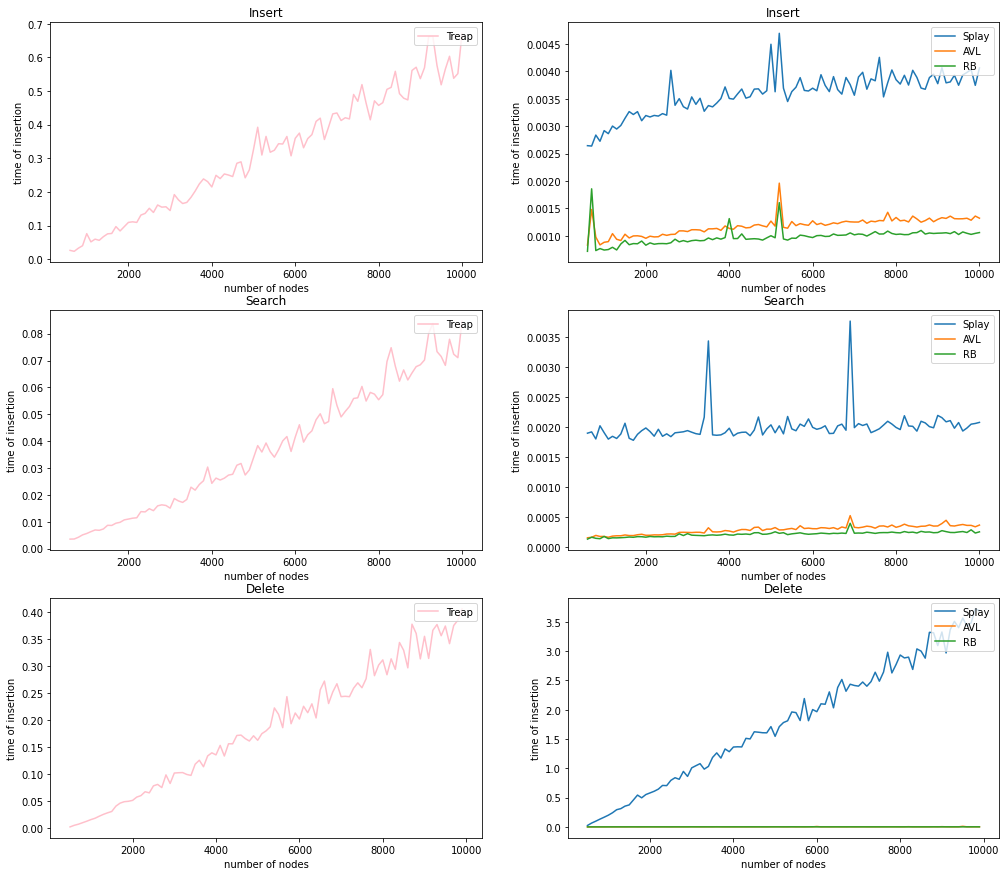

In [33]:
plot_insert_search_delete(500,100, 10000)